![Image](./img/dataset-diagram-logo.png)


**objectif** : pandas like but for **ndim**

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
truc = xr.DataArray(np.random.randint(2, 3))
truc

<xarray.DataArray ()>
array(2)

In [3]:
data = xr.DataArray(np.random.randint(6, size=(2, 3)), coords={'x': ['a', 'b']}, dims=('x', 'y'))
data

<xarray.DataArray (x: 2, y: 3)>
array([[4, 5, 2],
       [3, 3, 0]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

In [4]:
xr.DataArray(pd.Series(range(3), index=list('abc'), name='foo'))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

## Attribute of DataArray

In [5]:
print('values : ', data.values)
print('dims : ', data.dims)
print('coords : ', data.coords)
print('attrs metadata', data.attrs)

values :  [[4 5 2]
 [3 3 0]]
dims :  ('x', 'y')
coords :  Coordinates:
  * x        (x) <U1 'a' 'b'
attrs metadata {}


## Indexing

### numpy like

In [6]:
data[:, :2]

<xarray.DataArray (x: 2, y: 2)>
array([[4, 5],
       [3, 3]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

### pandas like with loc[]

In [7]:
data.loc[['a', 'b'], :]

<xarray.DataArray (x: 2, y: 3)>
array([[4, 5, 2],
       [3, 3, 0]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

### with isel()

In [8]:
data.isel(y=[0, 2])

<xarray.DataArray (x: 2, y: 2)>
array([[4, 2],
       [3, 0]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

### with sel()

In [9]:
data.sel(x=['a'])

<xarray.DataArray (x: 1, y: 3)>
array([[4, 5, 2]])
Coordinates:
  * x        (x) <U1 'a'
Dimensions without coordinates: y

## Attributes (metadata) usefull for protting

In [12]:
data.attrs['long_name'] = 'random unseless stuff'
data.attrs['units'] = 'mV'
data

<xarray.DataArray (x: 2, y: 3)>
array([[4, 5, 2],
       [3, 3, 0]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y
Attributes:
    long_name:  random unseless stuff
    units:      mV

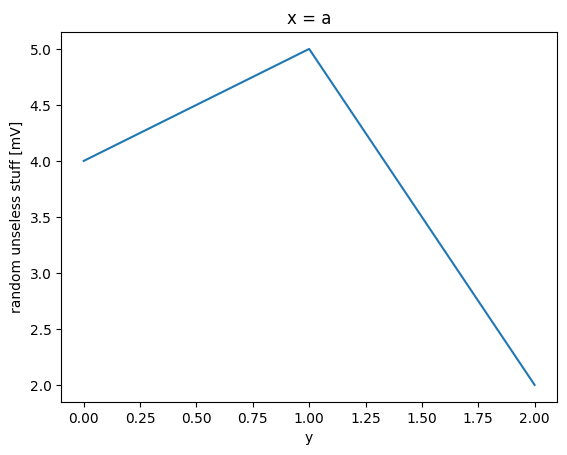

In [13]:
data.sel(x='a').plot()

## Computation / aggregation

In [14]:
# mais on peut utiliser les noms des axes au lieu de leur numéro
data.mean(dim='y')

<xarray.DataArray (x: 2)>
array([3.66666667, 2.        ])
Coordinates:
  * x        (x) <U1 'a' 'b'

## GroupBy

In [15]:
data

<xarray.DataArray (x: 2, y: 3)>
array([[4, 5, 2],
       [3, 3, 0]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y
Attributes:
    long_name:  random unseless stuff
    units:      mV

In [16]:
labels = xr.DataArray(['E', 'F', 'E'], coords = [data.coords['y']], name='labels')
labels

<xarray.DataArray 'labels' (y: 3)>
array(['E', 'F', 'E'], dtype='<U1')
Coordinates:
  * y        (y) int64 0 1 2

In [19]:
data1 = data.groupby(labels).sum('y')
data1

<xarray.DataArray (x: 2, labels: 2)>
array([[6, 5],
       [3, 3]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * labels   (labels) object 'E' 'F'
Attributes:
    long_name:  random unseless stuff
    units:      mV

In [20]:
data2 = data.groupby(labels).apply(lambda x: x - x.min())
data2

<xarray.DataArray (x: 2, y: 3)>
array([[4, 2, 2],
       [3, 0, 0]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

## Pandas

In [21]:
series = data.to_series()
series

x  y
a  0    4
   1    5
   2    2
b  0    3
   1    3
   2    0
dtype: int64

In [22]:
series.to_xarray()

<xarray.DataArray (x: 2, y: 3)>
array([[4, 5, 2],
       [3, 3, 0]])
Coordinates:
  * x        (x) object 'a' 'b'
  * y        (y) int64 0 1 2

## Dataset = DataArray in the same place

In [23]:
times = np.arange(0, 10, 0.01)
freqs = np.arange(10, 50, 2.)

data1 = xr.DataArray(np.random.randn(times.size),
                     coords={'times': times},
                     dims=('times'))

data2 = xr.DataArray(np.random.randn(times.size, freqs.size),
                     coords={'times': times, 'freqs': freqs},
                     dims=('times', 'freqs'))



ds = xr.Dataset({'raw_signal': data1,
                 'time_freq' : data2,
                 'one_scalar': np.pi})
ds

<xarray.Dataset>
Dimensions:     (times: 1000, freqs: 20)
Coordinates:
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
Data variables:
    raw_signal  (times) float64 -0.8597 0.0629 -0.4045 ... 0.7232 -0.3814 -1.096
    time_freq   (times, freqs) float64 -0.3754 0.3006 -0.964 ... 0.09595 -0.7498
    one_scalar  float64 3.142

In [24]:
ds['raw_signal']

<xarray.DataArray 'raw_signal' (times: 1000)>
array([-8.59664016e-01,  6.29027473e-02, -4.04521571e-01,  1.12235592e+00,
       -1.32804729e+00,  7.69587975e-01,  1.38217142e+00,  1.24180960e+00,
        2.18721915e-01, -7.61152453e-01,  1.50382111e-01,  3.94986897e-01,
       -1.21830531e+00,  1.14783797e+00, -1.83784553e-01,  5.13738489e-01,
       -1.64813098e-03,  1.46589225e+00,  6.39748643e-01,  3.91672838e-01,
        5.56962517e-02, -9.56591999e-01, -1.14419111e+00,  1.00798074e+00,
       -6.96409724e-01,  1.53465098e-02, -7.33062462e-01, -1.00564583e+00,
       -5.26210994e-01, -2.31439555e+00, -9.69792793e-01,  8.41353501e-01,
       -2.32098968e-02, -2.07601302e+00, -7.99932009e-01,  1.35130388e+00,
       -5.99089429e-01, -1.19855495e-01, -9.21082736e-01, -7.61545756e-01,
       -2.99634987e-01, -6.00576622e-01, -9.66480368e-02,  4.38704822e-01,
       -6.67227732e-01, -6.92234428e-01, -9.76158303e-01,  3.95794553e-01,
       -1.78984852e+00,  3.17487245e-01,  1.28322981e+00, -8.90908266e-01,
        3.05355580e-01,  1.60497799e+00, -1.09458360e+00, -1.41824863e+00,
       -1.39939993e+00,  2.50390538e+00, -9.97862071e-01,  1.74775317e+00,
        1.16591923e+00, -1.04464002e-01, -1.61485675e+00,  7.42958911e-01,
        4.60727137e-01, -1.51919971e-01, -1.12626203e+00,  7.83622442e-02,
       -3.07715196e-01, -1.94660111e-03, -4.77277297e-01, -2.08599304e-01,
        4.88904113e-01,  8.99202795e-02,  2.12932374e+00, -5.83536028e-01,
        1.08583427e+00,  6.95661717e-01,  1.15014103e+00, -5.46429051e-01,
...
        5.40036584e-01, -8.77109174e-01,  1.11892809e+00, -1.01295805e+00,
       -1.63504404e-01,  1.04178345e+00,  7.89525441e-01, -1.63290748e+00,
       -4.94333314e-01,  1.25020640e+00, -6.75248938e-01,  8.65180343e-01,
        8.68926497e-01,  1.01182990e+00, -6.64344325e-01, -2.16178098e-01,
        2.16157037e+00, -1.07608988e+00, -5.10447969e-01,  3.21974784e-01,
        2.44372854e-01, -7.08658434e-01,  7.76600969e-01,  6.16882996e-01,
       -7.17058748e-01,  1.12086317e+00,  1.17498092e+00, -4.51988855e-01,
        9.12034244e-01, -9.10888174e-02, -3.56151764e-01, -1.42242151e-01,
        1.05651304e-01, -4.65891562e-01, -1.25451311e+00, -2.57907082e+00,
        7.12267053e-01,  8.58377911e-01,  6.88295367e-01, -6.33393164e-01,
        1.15723175e-01, -1.44268044e-01, -8.17909386e-01,  3.36613203e-01,
        9.09291342e-01, -1.05591061e+00, -1.63601858e-01, -5.40381224e-01,
        4.00261168e-01, -1.28561419e+00, -5.69454344e-01, -2.50291744e-01,
        1.20443757e+00, -9.40532254e-01, -1.71415539e+00,  6.54005312e-01,
       -3.83649878e-01,  4.96432596e-02,  1.40142273e-01,  2.64714969e-03,
       -1.26065564e-01,  6.14767695e-02,  2.52753239e-01, -5.13677678e-02,
        1.50431324e-01, -6.97337232e-01,  1.37807511e+00,  6.85449598e-01,
        2.65961730e-01, -4.38237448e-01,  2.49193197e-01,  1.67307567e-01,
       -8.03886614e-01,  1.35269173e+00, -7.16646129e-01,  2.00600515e+00,
        4.12062614e-01,  7.23174946e-01, -3.81415536e-01, -1.09571510e+00])
Coordinates:
  * times    (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99

In [25]:
ds.isel(times=slice(0,100))

<xarray.Dataset>
Dimensions:     (times: 100, freqs: 20)
Coordinates:
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 0.96 0.97 0.98 0.99
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
Data variables:
    raw_signal  (times) float64 -0.8597 0.0629 -0.4045 ... -1.598 -0.07605
    time_freq   (times, freqs) float64 -0.3754 0.3006 -0.964 ... -0.8215 -0.4095
    one_scalar  float64 3.142

## NetCDF (xarray format based on HDF5)

In [26]:
ds.to_netcdf('example.nc')

In [27]:
xr.open_dataset('example.nc')

<xarray.Dataset>
Dimensions:     (times: 1000, freqs: 20)
Coordinates:
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
Data variables:
    time_freq   (times, freqs) float64 ...
    raw_signal  (times) float64 ...
    one_scalar  float64 ...

## zarr (xarray format based on zarr)

In [28]:
ds.to_zarr('example.zarr')

In [29]:
xr.open_dataset('example.zarr')

/home/samuel/.virtualenvs/py3.11/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


<xarray.Dataset>
Dimensions:     (freqs: 20, times: 1000)
Coordinates:
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99
Data variables:
    one_scalar  float64 ...
    raw_signal  (times) float64 ...
    time_freq   (times, freqs) float64 ...

## Exercice 1

 * Explorer le dossier `data/data_folder`
 * Créer un DataSet/DataArray pour organiser les datas de manieres multi dimensionel
 
 Chaque tableau `*.npy` a pour shape `(4, 3)`
 On peut considerer ces dimenssion comme `(trial, question)` avec trial de 0 à 4 and question 'a', 'b', 'c'

## Solution 1

In [30]:
!ls -r data/data_folder/*

data/data_folder/UJ03:
session_5.npy  session_4.npy  session_3.npy  session_2.npy  session_1.npy

data/data_folder/ST01:
session_5.npy  session_4.npy  session_3.npy  session_2.npy  session_1.npy

data/data_folder/LM04:
session_5.npy  session_4.npy  session_3.npy  session_2.npy  session_1.npy

data/data_folder/HJ02:
session_5.npy  session_4.npy  session_3.npy  session_2.npy  session_1.npy


In [31]:
from pathlib import Path
folder = Path('data/data_folder')

subjects = [f.stem for f in folder.iterdir()]
subjects

sessions = [int(f.stem.replace('session_', '')) for f in (folder / subjects[0]).iterdir()]
sessions = sorted(sessions)
sessions
# mydata = {}
# for file_path in folder.glob('**/*.npy'):
#     subject = file_path.parents[0].stem
#     session = int(file_path.stem.replace('session_', ''))
#     if subject not in mydata:
#         mydata[subject] = {}
#     arr = np.load(file_path)
# mydata


[1, 2, 3, 4, 5]

In [32]:
coords = {
    'subjects' : subjects,
    'sessions' : sessions,
    'trial' : np.arange(4),
    'questions' : np.array(['a', 'b', 'c'])
}
data = xr.DataArray(coords=coords, dims=['subjects', 'sessions', 'trial','questions'])
data



<xarray.DataArray (subjects: 4, sessions: 5, trial: 4, questions: 3)>
array([[[[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

...

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]]]])
Coordinates:
  * subjects   (subjects) <U4 'ST01' 'LM04' 'HJ02' 'UJ03'
  * sessions   (sessions) int64 1 2 3 4 5
  * trial      (trial) int64 0 1 2 3
  * questions  (questions) <U1 'a' 'b' 'c'

In [33]:
for subject in subjects:
    for session in sessions:
        file_path = folder / subject / f'session_{session}.npy'
        np_arr = np.load(file_path)
        data.loc[subject, session, :, :] = np_arr

data

<xarray.DataArray (subjects: 4, sessions: 5, trial: 4, questions: 3)>
array([[[[ 0.98709994, -1.56206329,  0.67991403],
         [ 0.15045004, -0.04870027,  0.92348229],
         [-0.06379522,  0.31838826, -0.97254135],
         [-0.4318255 ,  0.56316911,  0.51542128]],

        [[-1.37446607,  0.77471333, -3.32607595],
         [ 2.13101326,  0.20674242, -1.10742134],
         [-1.43194356,  2.15985496, -1.37384019],
         [ 0.85982173, -0.06844014, -0.1607968 ]],

        [[ 1.23919226, -0.12958547,  0.78818082],
         [-0.60837368,  0.07957184,  0.23778785],
         [ 0.71276165, -0.69707259,  0.87300822],
         [-0.31410541,  0.79037717, -3.23867177]],

        [[-0.92839649,  0.64171505, -0.71272713],
         [-0.24419653,  1.79090322,  0.50802894],
         [-0.05288209, -0.36533635,  0.10701192],
         [-0.26140426, -0.00484426,  0.15658016]],

...

        [[ 0.39786945,  0.61703221,  0.15183394],
         [-0.43560855, -0.35867696,  1.34792642],
         [ 1.2627654 , -1.01953818,  1.44585437],
         [ 0.89007494,  0.61240892,  0.02416696]],

        [[ 2.52932469,  1.68744126,  1.94924154],
         [ 0.86571286,  0.87198381,  0.18029687],
         [ 2.25554749, -1.07055761, -0.48938934],
         [ 1.7422904 , -0.10962135,  1.14372104]],

        [[ 1.58631923, -0.72739628, -0.26158817],
         [ 2.56425695,  1.13199062,  0.54568674],
         [-0.49778992,  1.4074506 , -0.4162464 ],
         [ 1.55625927,  0.60217849,  0.3552943 ]],

        [[-1.45133283, -1.40125602, -1.99980305],
         [ 0.10602695,  0.43662809, -0.22712406],
         [ 0.52926951,  0.56603048, -1.72214415],
         [-0.67931098,  0.42050995,  0.09543247]]]])
Coordinates:
  * subjects   (subjects) <U4 'ST01' 'LM04' 'HJ02' 'UJ03'
  * sessions   (sessions) int64 1 2 3 4 5
  * trial      (trial) int64 0 1 2 3
  * questions  (questions) <U1 'a' 'b' 'c'

In [34]:
ds = xr.Dataset()
ds['data'] = data
ds.to_netcdf('mydata.nc')

In [35]:
ds = xr.open_dataset('mydata.nc')
ds['data']

<xarray.DataArray 'data' (subjects: 4, sessions: 5, trial: 4, questions: 3)>
[240 values with dtype=float64]
Coordinates:
  * sessions   (sessions) int32 1 2 3 4 5
  * subjects   (subjects) object 'ST01' 'LM04' 'HJ02' 'UJ03'
  * trial      (trial) int32 0 1 2 3
  * questions  (questions) object 'a' 'b' 'c'

In [36]:
ds['data'].sel(subjects='LM04').sel(sessions=2)

<xarray.DataArray 'data' (trial: 4, questions: 3)>
[12 values with dtype=float64]
Coordinates:
    sessions   int32 2
    subjects   <U4 'LM04'
  * trial      (trial) int32 0 1 2 3
  * questions  (questions) object 'a' 'b' 'c'